# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [243]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [244]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [245]:
my_image = cv2.imread('image.jpg')
my_image = cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
grayscale_image = cv2.cvtColor(my_image, cv2.COLOR_RGB2GRAY)

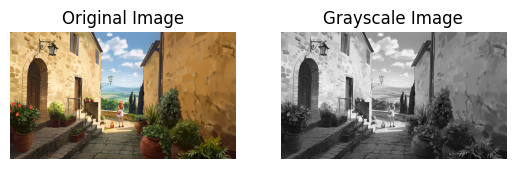

In [246]:
plt.subplot(1,2,1)
plt.imshow(my_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(grayscale_image,cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [247]:
print(grayscale_image.shape[0])
print(grayscale_image)

1969
[[132 145 136 ... 124 123 124]
 [137 142 130 ... 123 125 126]
 [136 135 124 ... 124 128 126]
 ...
 [ 52  50  49 ...  22  22  22]
 [ 52  49  48 ...  22  22  22]
 [ 53  51  50 ...  22  22  23]]


In [248]:
# Function to obtain histogram data form grayscale image using NumPy only
def gray_histogram(gray_img):
    histogram =np.zeros(256)
    for i in range(gray_img.shape[0]):
        for j in range(gray_img.shape[1]):
            histogram[gray_img[i][j]] +=1
    return histogram

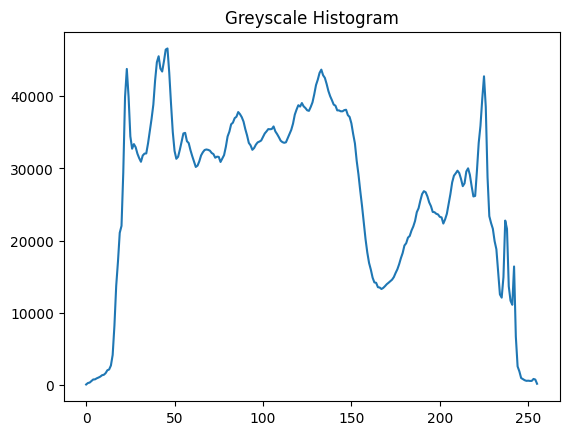

In [249]:
# Plot Historgram
plt.plot(gray_histogram(grayscale_image))
plt.title("Greyscale Histogram")
plt.show()

In [250]:
# Function to obtain histogram data form RGB image using only NumPy
def rgb_histogram(img_rgb):
    histogram_r = np.zeros(256)
    histogram_g = np.zeros(256)
    histogram_b = np.zeros(256)
    red , green ,blue = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
    for i in range(img_rgb.shape[0]):
        for j in range(img_rgb.shape[1]):
            histogram_r[red[i][j]] +=1
            histogram_g[green[i][j]] +=1
            histogram_b[blue[i][j]] +=1
    return histogram_r, histogram_g, histogram_b

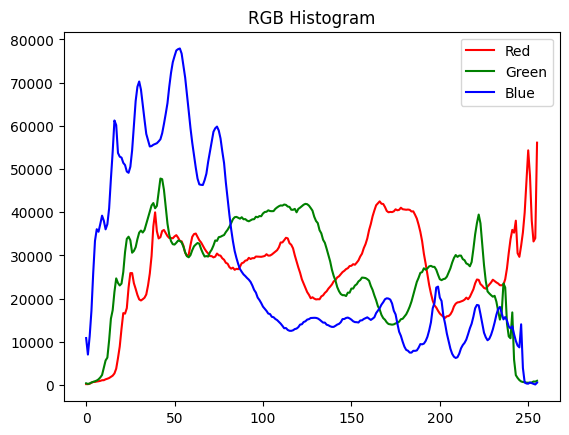

In [251]:
# Plot RGB Historgram
red , green , blue = rgb_histogram(my_image)
plt.plot(red,'r',label="Red")
plt.plot(green,'g',label="Green")
plt.plot(blue,'b',label='Blue')
plt.title("RGB Histogram")
plt.legend()
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [252]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

### Explaination
#### Refrence --- YT and ChatGPT
RGB and HSV are 2 different colour spaces represented using different geometric space. RGB is a Cube and HSV is like a hexacone.

Hue - degree(0-360)<br>
Saturation - value(0-1)<br>
Value Channel - value(0-1)<br>

<code>V = max(R,G,B)</code> Since brightest channel determines the overall brightness of the pixel.

<code>S = (max-min) / (max)</code> Saturation measures how far the color lies from the grayscale axis.

<code>Hue(H)</code> Hue requires different formulas based on which channel is the Maximum.
The piecewise formula identifies which RGB component dominates and maps the color to the correct angular position.

Basically, we are using formulas to map a point of RGB cube to a point on HSV Hexacone

In [253]:
def rgb_to_hsv(img):
    # Convert 0–255 RGB to float in 0–1 range
    red  = img[:, :, 0].astype(float) / 255.0
    green = img[:, :, 1].astype(float) / 255.0
    blue  = img[:, :, 2].astype(float) / 255.0

    # Compute max, min and difference per pixel
    max_val = np.maximum(np.maximum(red, green), blue)
    min_val = np.minimum(np.minimum(red, green), blue)
    diff = max_val - min_val

    # Prepare output arrays
    hue = np.zeros_like(max_val)
    sat = np.zeros_like(max_val)
    val = max_val

    # Compute saturation
    for x in range(max_val.shape[0]):
        for y in range(max_val.shape[1]):
            if max_val[x, y] != 0:
                sat[x, y] = diff[x, y] / max_val[x, y]

    # Compute hue
    for x in range(max_val.shape[0]):
        for y in range(max_val.shape[1]):
            if diff[x, y] == 0:
                continue

            if max_val[x, y] == red[x, y]:
                hue[x, y] = (green[x, y] - blue[x, y]) / diff[x, y]

            elif max_val[x, y] == green[x, y]:
                hue[x, y] = ((blue[x, y] - red[x, y]) / diff[x, y]) + 2

            else:  # max_val == blue[x, y]
                hue[x, y] = ((red[x, y] - green[x, y]) / diff[x, y]) + 4

            hue[x, y] = (hue[x, y] % 6) * 60  # convert to degrees

    # Convert S, V back to 0–255
    sat = (sat * 255).astype(np.uint8)
    val = (val * 255).astype(np.uint8)

    # Build HSV formatted for OpenCV
    hsv_out = np.zeros_like(img, dtype=np.float32)
    hsv_out[:, :, 0] = hue / 2  # OpenCV hue range is [0,179]
    hsv_out[:, :, 1] = sat
    hsv_out[:, :, 2] = val

    return hsv_out.astype(np.uint8)


In [254]:
hsv_image = rgb_to_hsv(my_image)

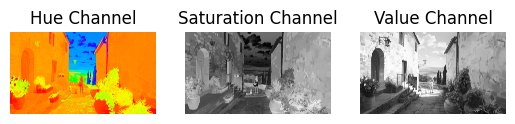

In [255]:
# Hue, Saturation, Value channels
plt.subplot(1,3,1)
plt.imshow(hsv_image[:,:,0],cmap='hsv')
plt.title("Hue Channel")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(hsv_image[:,:,1],cmap='gray')
plt.title("Saturation Channel")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(hsv_image[:,:,2],cmap='gray')
plt.title("Value Channel")
plt.axis("off")
plt.show()

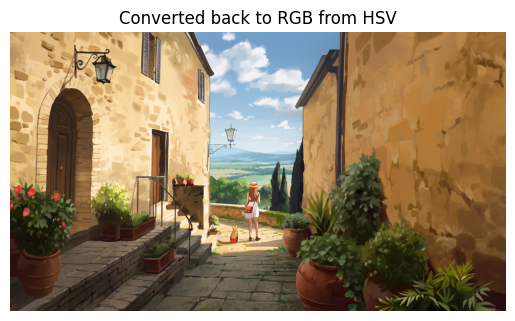

In [256]:
hsv_to_rgb= cv2.cvtColor(hsv_image,cv2.COLOR_HSV2RGB)
plt.imshow(hsv_to_rgb)
plt.title("Converted back to RGB from HSV")
plt.axis("off")
plt.show()

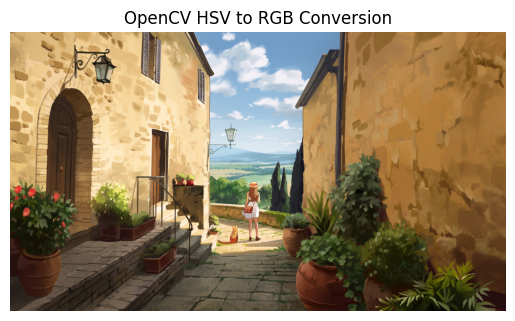

In [257]:
hsv_image_cv = cv2.cvtColor(my_image,cv2.COLOR_RGB2HSV)
hsv_cv_to_rgb = cv2.cvtColor(hsv_image_cv,cv2.COLOR_HSV2RGB)
plt.imshow(hsv_cv_to_rgb)
plt.title("OpenCV HSV to RGB Conversion")
plt.axis("off")
plt.show()

## Part C

#### Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [258]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

### Filter 1: Matrix look

In [259]:
cinematic_img= cv2.imread('download_k.jpg')
cinematic_img = cv2.cvtColor(cinematic_img, cv2.COLOR_BGR2RGB)

In [260]:
def matrix_filter(img_rgb):
    # convert to float
    img = img_rgb.astype(np.float32) / 255.0

    # basic contrast + brightness
    contrast = 1.25
    brightness = -0.03
    img = contrast * (img - 0.5) + 0.5 + brightness
    img = np.clip(img, 0, 1)

    # gamma correction
    gamma = 1.1
    img = np.clip(img, 0, 1) ** (1.0 / gamma)

    # reduce saturation (desaturate)
    bgr = img[..., ::-1]  # convert RGB -> BGR for cv2
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
    hsv[...,1] *= 0.45   # lower saturation
    hsv = np.clip(hsv, 0, 1)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    img = bgr[..., ::-1] # BGR -> RGB

    # tint image green (Matrix look)
    green_tint = np.array([0.0, 0.25, 0.0], dtype=np.float32)  # RGB
    strength = 0.35
    img = (1 - strength) * img + strength * (img + green_tint)
    img = np.clip(img, 0, 1)

    return (img * 255).astype(np.uint8)

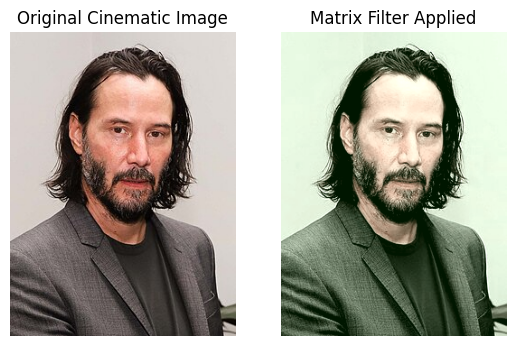

In [261]:
# Display original and filtered images
plt.subplot(1,2,1)
plt.imshow(cinematic_img)
plt.title("Original Cinematic Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(matrix_filter(cinematic_img))
plt.title("Matrix Filter Applied")
plt.axis('off')
plt.show()

In [271]:
# Tried to create Matrix-movie style filter but couldn't achieve the desired look

### Filter 2: Khana_Khazana
I am a foodie and taking a good picture of your food is a nightmare.<br>
So I created a filter to enhance the images of food so that it looks mouth watering in the image also.
This filter is specific for food photos.

In [262]:
food_img = cv2.imread('IMG 6.jpeg')
food_img = cv2.cvtColor(food_img, cv2.COLOR_BGR2RGB)

In [263]:
def Khana_Khazana(img_rgb):
    # convert to float 0–1
    img = img_rgb.astype(np.float32) / 255.0

    # basic contrast + brightness
    contrast = 1.20
    brightness = 0.04
    img = contrast * (img - 0.5) + 0.5 + brightness
    img = np.clip(img, 0, 1)

    # convert to HSV for saturation + hue edits
    bgr = img[..., ::-1]
    hsv = cv2.cvtColor((bgr * 255).astype(np.uint8), cv2.COLOR_BGR2HSV).astype(np.float32)

    # boost saturation for reds & yellows
    h = hsv[...,0]  # 0–179 in OpenCV
    s = hsv[...,1]  # 0–255

    red_mask = (h < 15) | (h > 165)       # red region
    yellow_mask = (h > 15) & (h < 40)     # yellow region
    mask = (red_mask | yellow_mask).astype(np.float32)[...,None]

    s = s * (1 + 0.35 * mask.squeeze())   # boost by +35% in selected areas
    s = np.clip(s, 0, 255)
    hsv[...,1] = s

    # small hue shift to enrich reds
    hsv[...,0] = (hsv[...,0] + 2) % 180   # tiny shift

    # convert back to RGB 
    bgr2 = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR).astype(np.float32) / 255.0
    img = bgr2[..., ::-1]

    # warm tint
    warm = np.array([0.10, 0.05, -0.02], dtype=np.float32)  # slight warm push
    img = img + warm
    img = np.clip(img, 0, 1)

    return (img * 255).astype(np.uint8)

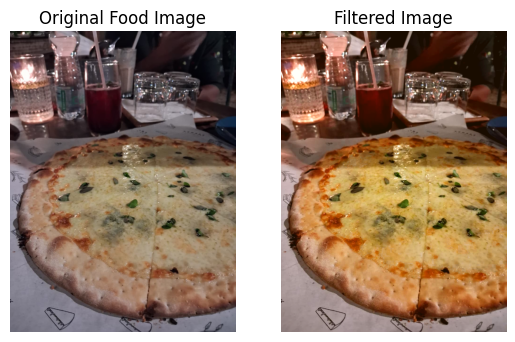

In [264]:
# Display original and filtered food images
plt.subplot(1,2,1)
plt.imshow(food_img)
plt.title("Original Food Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(Khana_Khazana(food_img))
plt.title("Filtered Image")
plt.axis('off')
plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [265]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [266]:
my_image = cv2.imread('images (1).jpg')
my_image = cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)

In [267]:
def white_patch_balance(img):
    # Split the image into its RGB components
    red = img[:, :, 0].astype(np.float32)
    green = img[:, :, 1].astype(np.float32)
    blue = img[:, :, 2].astype(np.float32)

    # Calculate the intensity of each pixel
    intensity = 0.299 * red + 0.587 * green + 0.114 * blue
    y, x = np.unravel_index(np.argmax(intensity, axis=None), intensity.shape)

    # Find the maximum value in each channel
    max_red = np.max(red)
    max_green = np.max(green)
    max_blue = np.max(blue)

    # Calculate scaling factors
    scale_red = 255.0 / max_red
    scale_green = 255.0 / max_green
    scale_blue = 255.0 / max_blue

    # Apply scaling factors to each channel
    balanced_red = np.clip(red * scale_red, 0, 255).astype(np.uint8)
    balanced_green = np.clip(green * scale_green, 0, 255).astype(np.uint8)
    balanced_blue = np.clip(blue * scale_blue, 0, 255).astype(np.uint8)

    # Merge the channels back into a single image
    balanced_img = np.zeros_like(img, dtype=np.uint8)
    balanced_img[:, :, 0] = balanced_red
    balanced_img[:, :, 1] = balanced_green
    balanced_img[:, :, 2] = balanced_blue

    return balanced_img

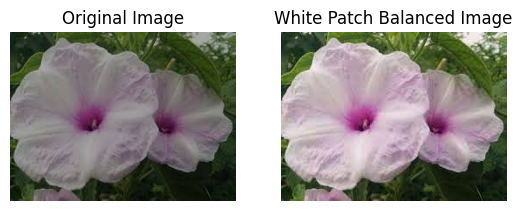

In [268]:
# Display original and white patch balanced images
plt.subplot(1,2,1)
plt.imshow(my_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(white_patch_balance(my_image))
plt.title("White Patch Balanced Image")
plt.axis("off")
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [269]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [270]:
# sorry I didn't had time to do this part